# Statistics of Text


## CORE-UA 109, Joanna Klukowska

In [1]:
# This code cell imports all the different libraries that the rest of this notebook 
# relies on. This cell has to be executed before any other cells can function. 
 
# this is a natural language processing toolking   
import nltk

# required for eliminating stopwords 
nltk.download('stopwords')
from nltk.corpus import stopwords

#required for breaking text into sentences 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

# required for working with syllables
nltk.download('cmudict')
from nltk.corpus import cmudict 


# This code cell also defines some additional capabilities. 



def count_syllables ( word ) :
  d = cmudict.dict()
  word = word.lower()
  if word not in d.keys() :
    return -1
  for x in d[word ] :
    syl = [] 
    for  y in x :
      if y[-1].isdigit() :
        syl.append( y[-1] )
  return len(syl)

[nltk_data] Downloading package stopwords to /home/asia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/asia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /home/asia/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [2]:
# This cell needs to be executed only once. 
# You can add other books to this list.  

!wget http://www.gutenberg.org/files/11/11-0.txt
!wget http://www.gutenberg.org/cache/epub/16328/pg16328.txt
!wget http://www.gutenberg.org/files/2701/2701-0.txt 
!wget http://www.gutenberg.org/files/74/74-0.txt   
  

--2018-11-26 09:13:01--  http://www.gutenberg.org/files/11/11-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173595 (170K) [text/plain]
Saving to: ‘11-0.txt.1’

11-0.txt.1          100%[===================>] 169.53K  --.-KB/s    in 0.1s    

2018-11-26 09:13:01 (1.57 MB/s) - ‘11-0.txt.1’ saved [173595/173595]

--2018-11-26 09:13:01--  http://www.gutenberg.org/cache/epub/16328/pg16328.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301063 (294K) [text/plain]
Saving to: ‘pg16328.txt.1’

pg16328.txt.1       100%[===================>] 294.01K  1022KB/s    in 0.3s    

2018-11-26 09:13:02 (1022 KB/s) - ‘pg163

In [3]:

file_AliceInWonderland = open('11-0.txt',"r", encoding="utf-8")
file_Beowulf = open('pg16328.txt',"r", encoding="utf-8")
file_MobyDick = open('2701-0.txt',"r", encoding="utf-8")
file_AdvOfTomSawyer = open('74-0.txt',"r", encoding="utf-8")


In [4]:
# If you wish to use a different book in this notebook, just change 
# the next line and rerun the remaining cells.
file = file_AliceInWonderland
file.seek(0)
text = file.read().replace("\n", " ").lower()

# Word Frequency


__How often a word occurs in the given text? __

To calculate it, we first need to break the text into individual words. 

- `split()` function works, but it does not do a great job (see the example below)

- `word_tokenize()` from the natural language processing toolkin (NLTK) does a much better job (although we will need to deal with all the _words_ that are not really words)


In [5]:
phrase = """ “Let’s eat, grandpa” versus “Let’s eat grandpa”. 
              Punctuation can potentially save lives! 
         """
words1 = phrase.split()
words2 = word_tokenize(phrase) 

for word in words1: 
  print(word, end = "  |  ")
print("\n\n")
for word in words2:
  print(word, end = "  |  ")

“Let’s  |  eat,  |  grandpa”  |  versus  |  “Let’s  |  eat  |  grandpa”.  |  Punctuation  |  can  |  potentially  |  save  |  lives!  |  


“  |  Let  |  ’  |  s  |  eat  |  ,  |  grandpa  |  ”  |  versus  |  “  |  Let  |  ’  |  s  |  eat  |  grandpa  |  ”  |  .  |  Punctuation  |  can  |  potentially  |  save  |  lives  |  !  |  

# Tallying the Words

The next step is to count how many times each of the words occurs. 

NLTK has a function called `FreqDist()` that does exactly that. 
It returns an object that can be thought of as a list of pairs that  contain the word itself and its count. (But it can do much more. )

In [6]:
phrase = """ “Let’s eat, grandpa” versus “Let’s eat grandpa”. 
              Punctuation can potentially save lives! 
         """
words2 = word_tokenize(phrase) 

frequencies = nltk.FreqDist(words2)

for key in frequencies: 
  print (key, " : ", frequencies[key])

“  :  2
Let  :  2
’  :  2
s  :  2
eat  :  2
,  :  1
grandpa  :  2
”  :  2
versus  :  1
.  :  1
Punctuation  :  1
can  :  1
potentially  :  1
save  :  1
lives  :  1
!  :  1


# Word Frequencies in Our Book - Take 1 

We will put it all together to find out the list of the most-used words in our book. 

In [7]:
# break the text of the book into individual words/tokens
words = word_tokenize(text )

# calculate the number of occurences of each work/token
freq = nltk.FreqDist(words) 

# plot the 20 most popular ones 
freq.plot(20, cumulative=False)

<Figure size 640x480 with 1 Axes>

__What is the problem with the above date?__

# Word Frequencies in Our Book - Take 2

We need to remove the things from the list of words that are not actual words. 
This is often refered to as _cleaning_ of the data set. 
We will do this in two steps:
- remove the _stop words_ - these are frequently occuring, usually short words that do not have much meaning, like "to", "a", ... (NLTK has a list of those)
- remove all the punctuation marks 

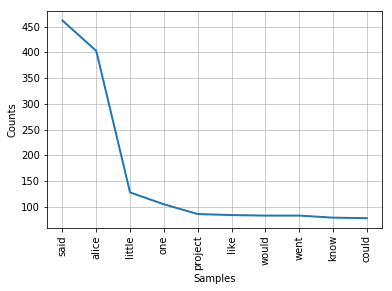

In [8]:
# make a copy of the words and call it clean_words
clean_words = words[0:]

# get the list of stop words from the nltk 
stop_words = stopwords.words('english')

for word in words:
  # remove all stop words from the clean_words list 
  if word in stop_words:
    clean_words.remove(word)
  # remove short 
  if not word.isalpha()  :
    clean_words.remove(word)
    
freq_clean = nltk.FreqDist(clean_words)

freq_clean.plot(10, cumulative=False)

In [9]:
print(freq["cat"])
print(freq["dog"])

37
3


# Sentences

In some cases, we may want to obtain individual sentences from the text. 
This can be done with the `sent_tokenize()` function from the NLTK (`sent` stands for _sentence_, not sending something). 

In [10]:
phrase = """ “Let’s eat, grandpa!” versus “Let’s eat grandpa!”. 
              Punctuation can potentially save lives! I went to sleep. 
         """
sents = sent_tokenize(phrase) 

for sent in sents: 
  print(sent)

 “Let’s eat, grandpa!” versus “Let’s eat grandpa!”.
Punctuation can potentially save lives!
I went to sleep.


# Breaking Our Book into Sentences

Using the same idea for our book, we can easily figure out how many sentences there are in the text. 

In [11]:

sentences = sent_tokenize(text)
print("There are", len(sentences), "sentences in this book.")

print("\nThe fifth sentence is: \n", sentences[4])

print("\nThe twentry fouth sentence is: \n", sentences[23])



There are 1085 sentences in this book.

The fifth sentence is: 
 i shall be late!’ (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see it pop down a large rabbit-hole under the hedge.

The twentry fouth sentence is: 
 do you think you could manage it?)


# Lengths of Sentences - Challenge

Write a program that given a list of sentences calculates the length of the longest, shortest and the average sentence. 

The length is measured in the number of characters. 

In [12]:
# create a list of lengths of words
lengths = []
for s in sentences :
  # strip any white-space characters from the start and end of sentences
  lengths.append( len(s.strip() ) ) 
  
# calculate the stats 
average_sentence_length = sum(lengths)/ len(lengths) 
max_sentence_length = max(lengths)
min_sentence_length = min(lengths)

# print the results 
print( average_sentence_length)
print( max_sentence_length)
print( min_sentence_length)



149.33824884792628
1472
3


# Counting Syllables 

For some of the readability measures we needed to be able to determine the number of syllables in a word (or sentence or text). 

The top of this notebook, defines a function that calculates the number of syllables given a word. It uses CMU pronounciation dictionary to accomplish this task. 

The function returns -1 if the word does not appear in the CMU dictionary. 



In [17]:
# word = "cat"
# word = "statistics"
# word = "antidisestablishmentarianism"
word = "Klukowska"
count = count_syllables ( word )
print (word, "has", count, "syllable(s)") 

Klukowska has -1 syllable(s)


# Counting Syllables - Challenges

- Write a program that determines the number of syllables in the entire text of our book. Determine the word with the largest number of syllables and the average number of syllables per word. 

- Write a program that determines the number of syllables in each of the sentences. (Be careful trying to print these reseults - for long books it may take a lot of time.)

- Write a program that determines the average number of syllables per sentence in our book. 

In [26]:
total = 0 
counted_words = 0
max_syl = 0 
max_word = ""
my_words = ["Klukowska", "is", "moody", "today"]
for word in my_words: 
    c = count_syllables(word)
    print ( word, c )
    if c > 0 : 
        counted_words = counted_words + 1
        total = total + c 
        if c > max_syl :
            max_syl = c 
            max_word = word 

print ("Total:", total)
print ("Average: ", total / counted_words)
print ("Largest:", max_syl, "in ", max_word)






Klukowska -1
is 1
moody 2
today 2
Total: 5
Average:  1.6666666666666667
Largest: 2 in  moody


In [ ]:
count_syl = 0
count_words = 0 
max_syl = 0


for word in clean_words:
  c = count_syllables( word ) 
  if (c > 0): 
    count_syl = count_syl + c 
    count_words = count_words + 1
    if max_syl < c :
      max_syl = c

print ("syllables found:", count_syl)
print ("words counted:", count_words)
print ("words ignored:", len(clean_words) - count_words)
print ("syllables per word on average:", count_syl / count_words)
print ("the largest number of syllables in one word:", max_syl)
    

# Flesch-Kincaid Index

Recall that Flesch-Kincaid Index is used to asses the difficulty of reading materials. 

The result is a number that corresponds with a US grade level.

It is calculated using the following formula:

$$0.39(\dfrac{\text{total words}}{\text{total sentences}})  + 11.8 (\dfrac{\text{total syllables}}{\text{total words}}) - 15.59$$

In [ ]:
tot_sentences = len(sentences)
tot_words = count_words
tot_syllables = count_syl

fk_index = 0.39 * tot_words/tot_sentences \
      + 11.8 * tot_syllables/tot_words \
      - 15.59

print("The Flesch-Kincaid index is", fk_index)